### Artifical Intelligence Assignment 1
## Tweaking A* search to solve the 8 puzzle problem

This notebook is presents how the 8 puzzle problem can be solved with a "depth limited BFS" version of the usual A* search.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import queue
import random

### Node Class

The following class models each node(state) of the search tree. 
Each "Node" has the following characteristics:

1. `board`: a 2D numpy array consisting of the board configuration 
2. `blank_pos_x` and `blank_pos_y`: coodinates (0-indexed) of the blank position
3. `gval`: cost till now in the search tree (incremented by 1 as 8 puzzle has uniform costs)


In [2]:
class Node:
    
    def __init__(self,initial_config,gval):

        #Load configuration into board
        self.board = initial_config

        #Store the blank position information
        self.blank_pos_x = list(zip(*np.where(initial_config == '_')))[0][0]
        self.blank_pos_y = list(zip(*np.where(initial_config == '_')))[0][1]

        #Storing g scores
        self.gval = gval
        
    #Tie breaker functions when priority(f value) in the priority queue is same
    
    def __lt__(self, node2):
        return self.gval < node2.gval
    
    def __gt__(self, node2):
        return self.gval > node2.gval
        
    def __str__(self):
        return(str(self.board))

### Moving the blank

The next function `move_blank` moves the blank in any of the four directions, as long as it is a legal move and doesn't go out of the board.

_Note: a NoneType object is returned if move in that direction is not possible_

In [3]:
def move_blank(node,direction): #Move blank of 'node' in 'direction'

    #To move blank space in any of the directions:'up','down','right','left'

    blank_pos_x = node.blank_pos_x
    blank_pos_y = node.blank_pos_y

    config = np.copy(node.board)

    #Node to be returned
    new_node = Node(config,0)


    #UP
    if(direction == 'up'):
        if(node.blank_pos_x != 0):

            #Swap board[blank_pos_x][blank_pos_y] with board[blank_pos_x-1,blank_pos_y]
            temp = new_node.board[blank_pos_x][blank_pos_y]
            new_node.board[blank_pos_x][blank_pos_y] = new_node.board[blank_pos_x-1][blank_pos_y]
            new_node.board[blank_pos_x-1][blank_pos_y] = temp

            #Update blank position coodinates
            new_node.blank_pos_x = new_node.blank_pos_x-1
            
            #Update gval
            new_node.gval = node.gval+1
            
            return new_node
        else:
            return None
    #DOWN
    elif(direction == 'down'):
         if(node.blank_pos_x != 2):

            #Swap board[blank_pos_x][blank_pos_y] with board[blank_pos_x+1,blank_pos_y]
            temp = new_node.board[blank_pos_x][blank_pos_y]
            new_node.board[blank_pos_x][blank_pos_y] = new_node.board[blank_pos_x+1][blank_pos_y]
            new_node.board[blank_pos_x+1][blank_pos_y] = temp

            #Update blank position coodinates
            new_node.blank_pos_x = new_node.blank_pos_x+1
            
            #Update gval
            new_node.gval = node.gval+1
            
            return new_node
         else:
            return None
    #LEFT
    elif(direction == 'left'):
         if(node.blank_pos_y != 0):

            #Swap board[blank_pos_x][blank_pos_y] with board[blank_pos_x,blank_pos_y-1]
            temp = new_node.board[blank_pos_x][blank_pos_y]
            new_node.board[blank_pos_x][blank_pos_y] = new_node.board[blank_pos_x][blank_pos_y-1]
            new_node.board[blank_pos_x][blank_pos_y-1] = temp

            #Update blank position coodinates
            new_node.blank_pos_y = new_node.blank_pos_y-1
            
            #Update gval
            new_node.gval = node.gval+1
            
            return new_node
         else:
            return None

     #RIGHT
    elif(direction == 'right'):
         if(node.blank_pos_y != 2):

            #Swap board[blank_pos_x][blank_pos_y] with board[blank_pos_x,blank_pos_y+1]
            temp = new_node.board[blank_pos_x][blank_pos_y]
            new_node.board[blank_pos_x][blank_pos_y] = new_node.board[blank_pos_x][blank_pos_y+1]
            new_node.board[blank_pos_x][blank_pos_y+1] = temp

            #Update blank position coodinates
            new_node.blank_pos_y = new_node.blank_pos_y+1  
            
            #Update gval
            new_node.gval = node.gval+1
            return new_node
         else:
            return None

In [4]:
#Global Variable to keep track of the goal state
goal_state = np.array([['_',1,2],[3,4,5],[6,7,8]]) 
print(goal_state)

[['_' '1' '2']
 ['3' '4' '5']
 ['6' '7' '8']]


### Heuristic Functions

Following are the implementations of the 2 heuristic functions used for analysis:

1. `manhattan`: Defines the manhattan distance (city block distance) between a cell on the board and its position in the goal state
2. `mismatch`: Defines the total number of cells which are not at their intended locations in the goal state

In [5]:
def manhattan(node):
    
    m = 0
    
    #Searching for rows and columns of board entry in goal_state
    for i in range(0,3):
        for j in range(0,3):
            if(node.board[i][j] != '_'):
                goal_row = list(zip(*np.where(goal_state == str(node.board[i][j]))))[0][0]
                goal_col = list(zip(*np.where(goal_state == str(node.board[i][j]))))[0][1]

                #print(abs(i-goal_row) +abs(j-goal_col) )
                #Calculating manhattan distance
                m = m + abs(i-goal_row)
                m = m + abs(j-goal_col)
            
    return m
            

In [6]:
def mismatch(node):
    
    m = 0
    
    #Searching for rows and columns of board entry in goal_state
    for i in range(0,3):
        for j in range(0,3):
            
            if(node.board[i][j] != '_'):
                
                goal_row = list(zip(*np.where(goal_state == str(node.board[i][j]))))[0][0]
                goal_col = list(zip(*np.where(goal_state == str(node.board[i][j]))))[0][1]

                #Checking if it is at its desired location
                if(goal_row != i or goal_col != j):
                    m = m+1
            
    return m
    

The following function `goal_test` simply checks whether a given array configuration is the goal state. `config` parameter is the node object.

In [7]:
def goal_test(config):
    return np.array_equal(config.board,goal_state)


### Search Functions

The following blocks implement the A* function and the corresponding utility functions, in accordance with the convention mentioned in the assignment problem sheet.

1. `expand`: expands a given node  by simply exploring all directions (STANDARD)
2. `modified_expand`: expands a given node in a BFS manner till depth `depth`
3. `search`: carries out the A* search for a given initial state, choice of heuristic and depth.


In [8]:
def expand(state,temp1):
    #Expand state and put into temp1 (fifo queue)
    
    if(move_blank(state,'up')!=None):
        temp1.put(move_blank(state,'up'))
    if(move_blank(state,'down')!=None):
        temp1.put(move_blank(state,'down'))
    if(move_blank(state,'right')!=None):
        temp1.put(move_blank(state,'right'))
    if(move_blank(state,'left')!=None):
        temp1.put(move_blank(state,'left'))
        
    return temp1
    

In [9]:
def modified_expand(state,depth):
    
    temp1 = queue.Queue()
    temp1 = expand(state, temp1)
        
    temp2 = queue.Queue()
    
    for i in list(temp1.queue):
        temp2.put(i)
    
    d = depth-1
    
    while(d>0):

        while(True):
            
            if(temp2.empty() == True):
                break
                
            exp_node = temp2.get()
            
            temp3 = queue.Queue()
            temp3 = expand(exp_node,temp3)
        
            for i in list(temp3.queue):
                temp1.put(i)

        d = d-1
        temp2 = temp3
    
    return temp1

In [10]:
def search(initial_state,heuristic,depth,verbose=False):
    
    #initial node
    initial_node = Node(initial_state,0)
    
    #Priority queue creation
    fringe = queue.PriorityQueue()
    
    state = initial_node
    f = 0
    
    num_nodes_generated = 0
    
    max_fringe_val = -1
    
    while(True):

        temp = modified_expand(state,depth)
        num_nodes_generated += temp.qsize()
        
        for i in list(temp.queue):
            f = heuristic(i) + i.gval
            fringe.put((f,i)) #(priority,data)
        
        if(max_fringe_val<fringe.qsize()):
            max_fringe_val = fringe.qsize()
        state = fringe.get()[1] #Extracting data node
        
        if(verbose==True):
            print(state)
                   
        if(goal_test(state) == True):
            return (state,num_nodes_generated,max_fringe_val)
        
        #print(state)
  
    return (state,num_nodes_generated,max_fringe_val)
    

### Running the search with random initial instances 

We generate random initial instances in the following manner:

1. Start with the `goal_state` and move in any of the four directions randomly, `i` number of times (can be tweaked)
2. This gives us a random start state. 
3. Use this obtained start state to search for the goal state using the modified A* `search` function

In [11]:
map_dict = {1: 'up',2: 'down',3: 'left',4: 'right'}

In [12]:
def caller(heuristic,depth,verbose=False):

    #Number of random starts we want (atleast 10 as required)
    j=10

    while(j>0):

        initial_goal_state = Node(goal_state,0)
        
        i=30
        random_initial_state = Node(goal_state,0)

        while (i>0):
            rand_num = random.randint(1,4)

            #Chose a random move and execute
            if(move_blank(random_initial_state,map_dict.get(rand_num)) != None):
                random_initial_state = move_blank(random_initial_state,map_dict.get(rand_num))

            #print(rand_num)
            i = i-1

        print("........Initial State",j,"in progress..............\n")
        
        res,max_nodes,max_fringe = search(random_initial_state.board,heuristic,depth,verbose)
        
        #print(res)
        print("Path cost of this search is", res.gval)
        print("Number of nodes generated is", max_nodes)
        print("Maximum size of fringe is", max_fringe,"\n")
        
        j = j-1


    

### Testing the functions
Now that the basic foundation has been laid, you can edit information in the following cells to obtain desired results.
In the following cells, you will be abke to-
1. Run the `search` for random initial instances with your choice of heuristic and depth.
2. Do a custom search with custom initial state, heuristic and depth.

### Carrying out search with custom initial state

### 1. Run the search for random initial instances with your choice of heuristic and depth.
* Set the variable `custom` to your desired depth.
* Set `verbose=True` if you would like to see the intermediate popped states from the fringe as well.

In [13]:
#Set it to your wish (custom depth)
custom = 2
verbose = False

In [14]:
#Heuristic: Mismatch, Depth:1
caller(mismatch,1,verbose)
print("END OF CALL")

........Initial State 10 in progress..............

Path cost of this search is 5
Number of nodes generated is 15
Maximum size of fringe is 11 

........Initial State 9 in progress..............

Path cost of this search is 5
Number of nodes generated is 15
Maximum size of fringe is 11 

........Initial State 8 in progress..............

Path cost of this search is 17
Number of nodes generated is 117907
Maximum size of fringe is 74892 

........Initial State 7 in progress..............

Path cost of this search is 8
Number of nodes generated is 43
Maximum size of fringe is 29 

........Initial State 6 in progress..............

Path cost of this search is 11
Number of nodes generated is 1312
Maximum size of fringe is 870 

........Initial State 5 in progress..............

Path cost of this search is 6
Number of nodes generated is 30
Maximum size of fringe is 21 

........Initial State 4 in progress..............

Path cost of this search is 7
Number of nodes generated is 76
Maximum si

In [15]:
#Heuristic: Mismatch, Depth:Custom
caller(mismatch,custom,verbose)
print("END OF CALL")

........Initial State 10 in progress..............

Path cost of this search is 6
Number of nodes generated is 343
Maximum size of fringe is 315 

........Initial State 9 in progress..............

Path cost of this search is 4
Number of nodes generated is 84
Maximum size of fringe is 78 

........Initial State 8 in progress..............

Path cost of this search is 2
Number of nodes generated is 27
Maximum size of fringe is 26 

........Initial State 7 in progress..............

Path cost of this search is 10
Number of nodes generated is 8350
Maximum size of fringe is 7628 

........Initial State 6 in progress..............

Path cost of this search is 7
Number of nodes generated is 883
Maximum size of fringe is 813 

........Initial State 5 in progress..............

Path cost of this search is 6
Number of nodes generated is 376
Maximum size of fringe is 340 

........Initial State 4 in progress..............

Path cost of this search is 9
Number of nodes generated is 2338
Maximum s

In [42]:
#Heuristic: Manhattan, Depth:1
caller(manhattan,1,verbose)
print("END OF CALL")

........Initial State 10 in progress..............

Path cost of this search is 2
Number of nodes generated is 5
Maximum size of fringe is 4 

........Initial State 9 in progress..............

Path cost of this search is 10
Number of nodes generated is 72
Maximum size of fringe is 47 

........Initial State 8 in progress..............

Path cost of this search is 7
Number of nodes generated is 27
Maximum size of fringe is 18 

........Initial State 7 in progress..............

Path cost of this search is 4
Number of nodes generated is 12
Maximum size of fringe is 9 

........Initial State 6 in progress..............

Path cost of this search is 4
Number of nodes generated is 12
Maximum size of fringe is 9 

........Initial State 5 in progress..............

Path cost of this search is 5
Number of nodes generated is 15
Maximum size of fringe is 11 

........Initial State 4 in progress..............

Path cost of this search is 2
Number of nodes generated is 8
Maximum size of fringe is 

In [16]:
#Heuristic: Manhattan, Depth:Custom
caller(manhattan,custom,verbose=True)
print("END OF CALL")

........Initial State 10 in progress..............

[['3' '1' '2']
 ['4' '_' '5']
 ['6' '7' '8']]
[['3' '1' '2']
 ['_' '4' '5']
 ['6' '7' '8']]
[['3' '1' '2']
 ['_' '4' '5']
 ['6' '7' '8']]
[['_' '1' '2']
 ['3' '4' '5']
 ['6' '7' '8']]
Path cost of this search is 3
Number of nodes generated is 49
Maximum size of fringe is 46 

........Initial State 9 in progress..............

[['2' '4' '_']
 ['1' '8' '5']
 ['3' '6' '7']]
[['2' '4' '5']
 ['1' '_' '8']
 ['3' '6' '7']]
[['2' '_' '5']
 ['1' '4' '8']
 ['3' '6' '7']]
[['2' '4' '5']
 ['_' '1' '8']
 ['3' '6' '7']]
[['2' '4' '5']
 ['_' '1' '8']
 ['3' '6' '7']]
[['2' '_' '5']
 ['1' '4' '8']
 ['3' '6' '7']]
[['_' '2' '5']
 ['1' '4' '8']
 ['3' '6' '7']]
[['2' '4' '5']
 ['3' '1' '8']
 ['_' '6' '7']]
[['2' '4' '5']
 ['3' '1' '8']
 ['_' '6' '7']]
[['2' '4' '5']
 ['3' '1' '8']
 ['_' '6' '7']]
[['_' '2' '5']
 ['1' '4' '8']
 ['3' '6' '7']]
[['_' '2' '5']
 ['1' '4' '8']
 ['3' '6' '7']]
[['2' '4' '5']
 ['3' '1' '8']
 ['6' '_' '7']]
[['2' '4' '5']
 ['3' '

### 2.Do a custom search with custom initial state, heuristic and depth

Change the initial state array according to you wish, with the blank being denoted as '_'. 

In [17]:
#This is the example from the book mentioned in the accompanying pdf (introduction)
initial_state = np.array([[7,2,4],[5,'_',6],[8,3,1]])
#If you use this example with depth 1 and heuristic manhattan, expect 26 as path cost!

In [18]:
depth = 1
heuristic = manhattan
verbose = False

In [19]:
res,num_nodes_gen,max_fringe_len = search(initial_state,heuristic,depth,verbose)
#May take some time, please wait!

In [20]:
print("The path cost = ",res.gval)
print("Number of nodes generated is", num_nodes_gen)
print("Maximum size of fringe is", max_fringe_len)

The path cost =  26
Number of nodes generated is 1291268
Maximum size of fringe is 802720


### Analysing data from the four calls

The cells below store the information from all the four calls for all of the initial states, to help us compare the values.

This function stores the data in the df.

In [21]:
#To store the results

#Heuristic Manhattan, Depth one
df_man_one = pd.DataFrame(columns = ['Path Cost','Num Nodes','Max Fringe'])

#Heuristic Manhattan, Depth custom
df_man_cus = pd.DataFrame(columns = ['Path Cost','Num Nodes','Max Fringe'])

#Heuristic Mismatch, Depth one
df_mis_one = pd.DataFrame(columns = ['Path Cost','Num Nodes','Max Fringe'])

#Heuristic Mismatch, Depth custom
df_mis_cus = pd.DataFrame(columns = ['Path Cost','Num Nodes','Max Fringe'])

def search_data_store(depth,verbose):

    #Number of random starts we want (atleast 10 as required)
    j=10

    while(j>0):

        initial_goal_state = Node(goal_state,0)
        
        i=30
        random_initial_state = Node(goal_state,0)

        while (i>0):
            rand_num = random.randint(1,4)

            #Chose a random move and execute
            if(move_blank(random_initial_state,map_dict.get(rand_num)) != None):
                random_initial_state = move_blank(random_initial_state,map_dict.get(rand_num))

            #print(rand_num)
            i = i-1

        print("........Initial State",j,"in progress..............")
        
        heuristic = manhattan
        res,max_nodes,max_fringe = search(random_initial_state.board,heuristic,1,verbose)
        df_man_one.loc[len(df_man_one)]=[res.gval,max_nodes,max_fringe]
        
        res,max_nodes,max_fringe = search(random_initial_state.board,heuristic,depth,verbose)
        df_man_cus.loc[len(df_man_cus)]=[res.gval,max_nodes,max_fringe]
        
        heuristic = mismatch
        res,max_nodes,max_fringe = search(random_initial_state.board,heuristic,1,verbose)
        df_mis_one.loc[len(df_mis_one)]=[res.gval,max_nodes,max_fringe]
        
        res,max_nodes,max_fringe = search(random_initial_state.board,heuristic,depth,verbose)
        df_mis_cus.loc[len(df_mis_cus)]=[res.gval,max_nodes,max_fringe]

        
        j = j-1

    print("DONE")    

In [22]:
depth = 2
verbose = False

In [23]:
search_data_store(depth,verbose)
#If this doesnt stop even after waiting for a few minutes, you can still break and see df values

........Initial State 10 in progress..............
........Initial State 9 in progress..............
........Initial State 8 in progress..............
........Initial State 7 in progress..............
........Initial State 6 in progress..............
........Initial State 5 in progress..............
........Initial State 4 in progress..............
........Initial State 3 in progress..............
........Initial State 2 in progress..............
........Initial State 1 in progress..............
DONE


In [24]:
df_man_one

,Path Cost,Num Nodes,Max Fringe
0,8,22,15
1,12,779,479
2,2,8,6
3,8,58,37
4,11,99,64
5,6,17,12
6,7,20,14
7,4,12,9
8,4,12,9
9,10,44,30


In [25]:
df_man_cus

,Path Cost,Num Nodes,Max Fringe
0,8,635,582
1,12,54990,49198
2,2,30,28
3,8,1075,975
4,11,4408,4011
5,6,236,217
6,7,391,359
7,4,84,78
8,4,84,78
9,10,3292,3019


In [26]:
df_mis_one

,Path Cost,Num Nodes,Max Fringe
0,8,89,58
1,12,4670,2890
2,2,8,6
3,8,91,59
4,11,2820,1828
5,6,17,12
6,7,74,49
7,4,12,9
8,4,15,11
9,10,300,202


In [27]:
df_mis_cus

,Path Cost,Num Nodes,Max Fringe
0,8,1892,1720
1,12,728166,651630
2,2,30,28
3,8,1932,1755
4,11,179761,163194
5,6,236,217
6,7,1054,960
7,4,84,78
8,4,95,88
9,10,13582,12428


Gathering Stats

In [28]:
stats = pd.DataFrame(columns=['Manhattan Depth 1','Manhattan Depth Custom','Mismatch Depth 1','Mismatch Depth Custom'])

In [29]:
stats.loc[len(stats)] = [df_man_one['Num Nodes'].median(),df_man_cus['Num Nodes'].median(),df_mis_one['Num Nodes'].median(),df_mis_cus['Num Nodes'].median()]
stats.loc[len(stats)] = [df_man_one['Max Fringe'].median(),df_man_cus['Max Fringe'].median(),df_mis_one['Max Fringe'].median(),df_mis_cus['Max Fringe'].median()]

In [30]:

stats = stats.rename(index={0: 'Number of Nodes generated',1:'Length of Fringe'})

In [31]:
stats.index.names = ['Median values of Parameters']
stats

,Manhattan Depth 1,Manhattan Depth Custom,Mismatch Depth 1,Mismatch Depth Custom
Median values of Parameters,,,,
Number of Nodes generated,21.0,513.0,81.5,1473.0
Length of Fringe,14.5,470.5,53.5,1340.0


### Time to visualise!

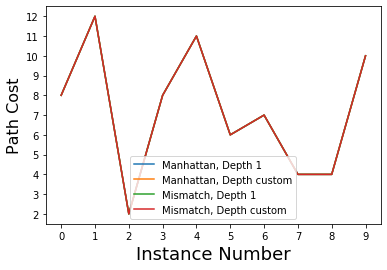

In [32]:
plt.xlabel('Instance Number', fontsize=18)
plt.ylabel('Path Cost', fontsize=16)
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,15,1))

plt.plot(df_man_one.index.values,df_man_one['Path Cost'],label = 'Manhattan, Depth 1')
plt.plot(df_man_cus.index.values,df_man_cus['Path Cost'],label = 'Manhattan, Depth custom')
plt.plot(df_mis_one.index.values,df_mis_one['Path Cost'],label = 'Mismatch, Depth 1')
plt.plot(df_mis_cus.index.values,df_mis_cus['Path Cost'],label = 'Mismatch, Depth custom')

plt.legend()

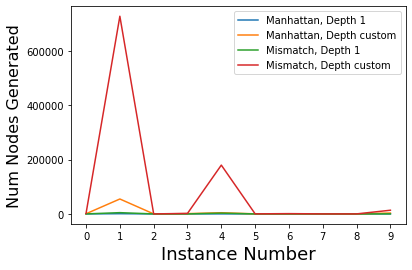

In [33]:
plt.xlabel('Instance Number', fontsize=18)
plt.ylabel('Num Nodes Generated', fontsize=16)
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,15000000,200000))

plt.plot(df_man_one.index.values,df_man_one['Num Nodes'],label = 'Manhattan, Depth 1')
plt.plot(df_man_cus.index.values,df_man_cus['Num Nodes'],label = 'Manhattan, Depth custom')
plt.plot(df_mis_one.index.values,df_mis_one['Num Nodes'],label = 'Mismatch, Depth 1')
plt.plot(df_mis_cus.index.values,df_mis_cus['Num Nodes'],label = 'Mismatch, Depth custom')

plt.legend()

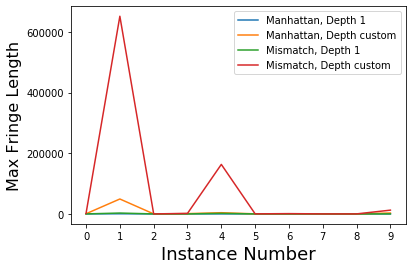

In [34]:
plt.xlabel('Instance Number', fontsize=18)
plt.ylabel('Max Fringe Length', fontsize=16)
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,15000000,200000))

plt.plot(df_man_one.index.values,df_man_one['Max Fringe'],label = 'Manhattan, Depth 1')
plt.plot(df_man_cus.index.values,df_man_cus['Max Fringe'],label = 'Manhattan, Depth custom')
plt.plot(df_mis_one.index.values,df_mis_one['Max Fringe'],label = 'Mismatch, Depth 1')
plt.plot(df_mis_cus.index.values,df_mis_cus['Max Fringe'],label = 'Mismatch, Depth custom')

plt.legend()